In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('chennai_house_price_prediction.csv')
df.head().T

,0,1,2,3,4
PRT_ID,P03210,P09411,P01812,P05346,P06210
AREA,Karapakkam,Anna Nagar,Adyar,Velachery,Karapakkam
INT_SQFT,1004,1986,909,1855,1226
DIST_MAINROAD,131,26,70,14,84
N_BEDROOM,1.0,2.0,1.0,3.0,1.0
N_BATHROOM,1.0,1.0,1.0,2.0,1.0
N_ROOM,3,5,3,5,3
SALE_COND,AbNormal,AbNormal,AbNormal,Family,AbNormal
PARK_FACIL,Yes,No,Yes,No,Yes
BUILDTYPE,Commercial,Commercial,Commercial,Others,Others


In [3]:
df.shape

(7109, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [7]:
df['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [8]:
df['QS_OVERALL'].unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [9]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].median())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].median())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].median())

In [10]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [11]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [12]:
df['PRT_ID'].nunique()  # we will perform label encoding

7109

In [13]:
df['AREA'].unique()   # we will perform label encoding

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [14]:
df['SALE_COND'].unique() # we will perform label encoding

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [15]:
df['PARK_FACIL'].unique()  # get dummies encoding after removing Noo

array(['Yes', 'No', 'Noo'], dtype=object)

In [16]:
df['BUILDTYPE'].unique()  # we will perform label encoding

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [17]:
df['UTILITY_AVAIL'].unique() # we will perform label encoding after removing AllPub

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [18]:
df['STREET'].unique()  # we will perform  get dumiies after removing NoAccess & Pavd

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [19]:
df['MZZONE'].unique() # label encoding

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [20]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [21]:
df['AREA'].nunique()

17

In [22]:
df['AREA'].replace({'Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Adyr':'Adyar',
                   'Velchery':'Velachery','Chormpet':'Chrompet','Chrmpet':'Chrompet',
                   'Chrompt':'Chrompet','KKNagar':'KK Nagar','TNagar':'T Nagar'},inplace=True)

In [23]:
df['AREA'].nunique()  # label Encoding

8

In [24]:
df['SALE_COND'].unique() # we will perform label encoding

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [25]:
df['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','Adj Land':'AdjLand',
                        'PartiaLl':'Partial'},inplace=True)

In [26]:
df['PARK_FACIL'].unique()  # get dummies

array(['Yes', 'No', 'Noo'], dtype=object)

In [27]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)

In [28]:
df['BUILDTYPE'].unique()  # get dumiies

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [29]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

In [30]:
df['UTILITY_AVAIL'].unique() # label Encoding

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [31]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [32]:
df['STREET'].unique()  # get dummies

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [33]:
df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'},inplace=True)

In [34]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label_enc=LabelEncoder()

In [37]:
df['AREA']=label_enc.fit_transform(df['AREA'])
df['SALE_COND']=label_enc.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=label_enc.fit_transform(df['UTILITY_AVAIL'])

In [38]:
df['MZZONE']=label_enc.fit_transform(df['MZZONE'])

In [39]:
df['PRT_ID']=label_enc.fit_transform(df['PRT_ID'])

In [40]:
df=pd.get_dummies(df,columns=['PARK_FACIL'])
df=pd.get_dummies(df,columns=['BUILDTYPE'])
df=pd.get_dummies(df,columns=['STREET'])

In [41]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108
PRT_ID,2266.00,6.664000e+03,1270.00,3755.00,4393.00,156.00,6447.00,6858.00,2382.00,6820.00,...,2692.00,3822.00,3525.00,3911.00,3593.00,2697.00,7086.00,6798.00,4601.00,6942.00
AREA,5.00,2.000000e+00,0.00,7.00,5.00,3.00,3.00,7.00,3.00,7.00,...,0.00,6.00,5.00,5.00,5.00,5.00,7.00,7.00,5.00,7.00
INT_SQFT,1004.00,1.986000e+03,909.00,1855.00,1226.00,1220.00,1167.00,1847.00,771.00,1635.00,...,895.00,1733.00,666.00,701.00,1462.00,598.00,1897.00,1614.00,787.00,1896.00
DIST_MAINROAD,131.00,2.600000e+01,70.00,14.00,84.00,36.00,137.00,176.00,175.00,74.00,...,197.00,191.00,51.00,100.00,68.00,51.00,52.00,152.00,40.00,156.00
N_BEDROOM,1.00,2.000000e+00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,2.00,...,1.00,1.00,1.00,1.00,2.00,1.00,3.00,2.00,1.00,3.00
N_BATHROOM,1.00,1.000000e+00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,...,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
N_ROOM,3.00,5.000000e+00,3.00,5.00,3.00,4.00,3.00,5.00,2.00,4.00,...,3.00,4.00,2.00,2.00,4.00,2.00,5.00,4.00,2.00,5.00
SALE_COND,0.00,0.000000e+00,0.00,2.00,0.00,4.00,4.00,2.00,1.00,0.00,...,1.00,0.00,1.00,0.00,2.00,1.00,2.00,3.00,4.00,4.00
UTILITY_AVAIL,0.00,0.000000e+00,1.00,3.00,0.00,2.00,0.00,0.00,3.00,1.00,...,3.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,1.00
MZZONE,0.00,3.000000e+00,4.00,2.00,1.00,3.00,4.00,5.00,5.00,2.00,...,2.00,4.00,2.00,3.00,5.00,5.00,3.00,2.00,4.00,2.00


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRT_ID                7109 non-null   int32  
 1   AREA                  7109 non-null   int32  
 2   INT_SQFT              7109 non-null   int64  
 3   DIST_MAINROAD         7109 non-null   int64  
 4   N_BEDROOM             7109 non-null   float64
 5   N_BATHROOM            7109 non-null   float64
 6   N_ROOM                7109 non-null   int64  
 7   SALE_COND             7109 non-null   int32  
 8   UTILITY_AVAIL         7109 non-null   int32  
 9   MZZONE                7109 non-null   int32  
 10  QS_ROOMS              7109 non-null   float64
 11  QS_BATHROOM           7109 non-null   float64
 12  QS_BEDROOM            7109 non-null   float64
 13  QS_OVERALL            7109 non-null   float64
 14  COMMIS                7109 non-null   int64  
 15  SALES_PRICE          

In [43]:
df.isnull().sum()

PRT_ID                  0
AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
UTILITY_AVAIL           0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
COMMIS                  0
SALES_PRICE             0
PARK_FACIL_No           0
PARK_FACIL_Yes          0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
STREET_Gravel           0
STREET_No Access        0
STREET_Paved            0
dtype: int64

<AxesSubplot:>

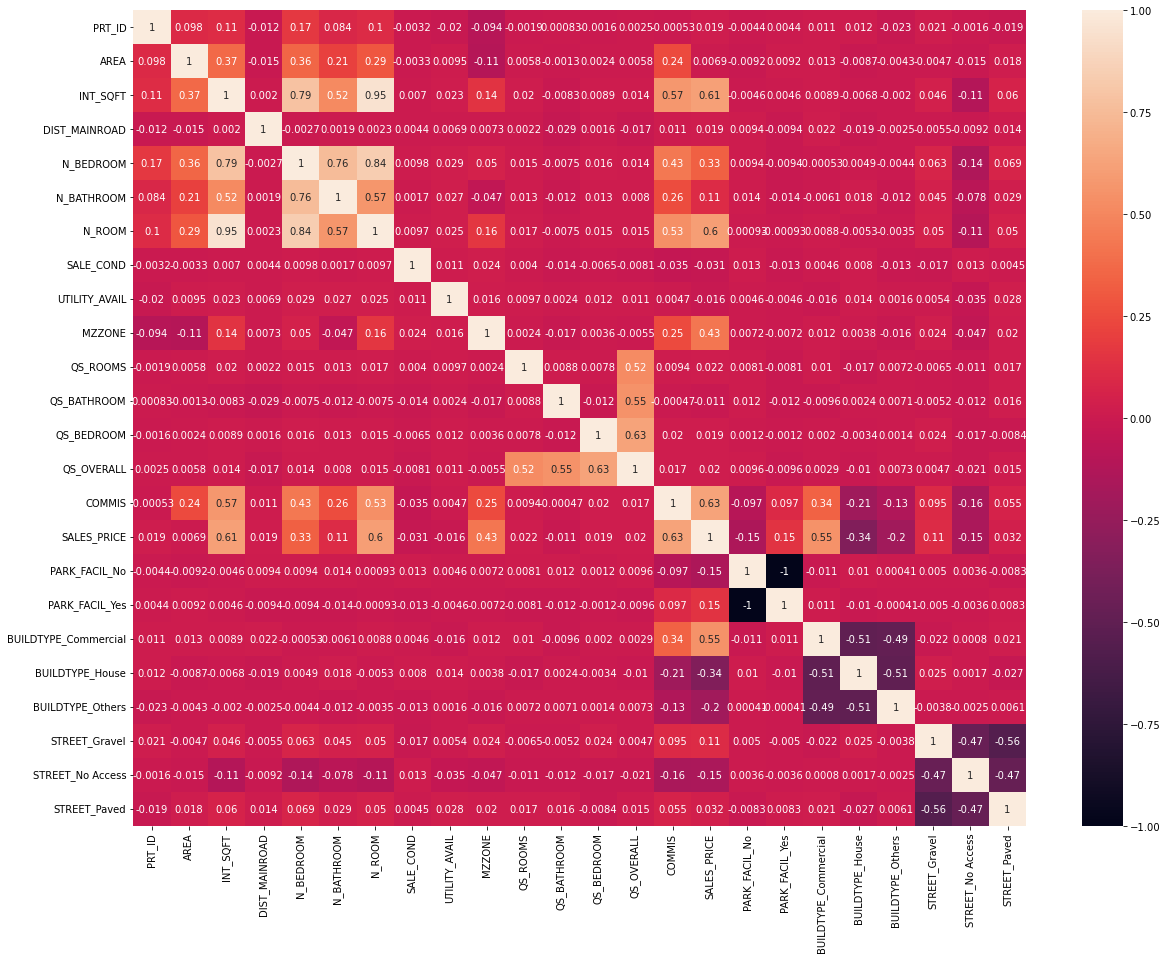

In [44]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True)

In [45]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'UTILITY_AVAIL', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'COMMIS',
       'SALES_PRICE', 'PARK_FACIL_No', 'PARK_FACIL_Yes',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'STREET_Gravel', 'STREET_No Access', 'STREET_Paved'],
      dtype='object')

# df['INT_SQFT']

In [46]:
df['INT_SQFT'].nunique()          # corr is 0.61

1699

<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

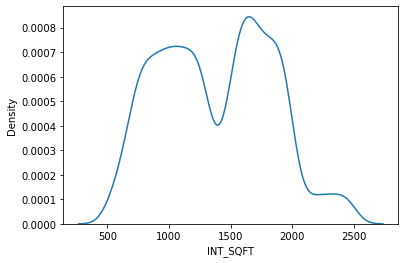

In [47]:
sns.kdeplot(df['INT_SQFT'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INT_SQFT'>

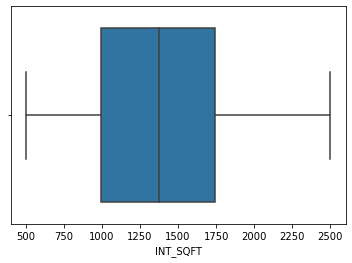

In [48]:
sns.boxplot(df['INT_SQFT'])      # no outliers

In [49]:
from scipy.stats import normaltest,shapiro

In [50]:
a,p_value=normaltest(df['INT_SQFT'])
print(p_value)
alpha=0.05
if p_value>alpha:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

1.4300814116463205e-202
Data is not normally distributed


In [51]:
a,p_value=shapiro(df['INT_SQFT'])
print(p_value)
alpha=0.05
if p_value>alpha:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

1.5501356789762224e-35
Data is not normally distributed


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# df['DIST_MAINROAD']

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

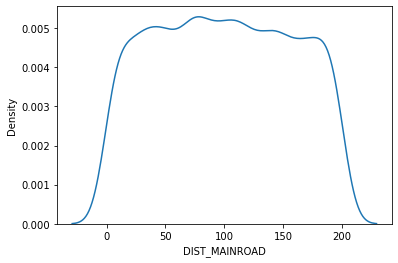

In [52]:
sns.kdeplot(df['DIST_MAINROAD'])

In [53]:
a,p_value=normaltest(df['DIST_MAINROAD'])
print(p_value)
alpha=0.05
if p_value>alpha:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

0.0
Data is not normally distributed


In [54]:
a,p_value=shapiro(np.log(df['DIST_MAINROAD']))  # log tranform
print(p_value)
alpha=0.05
if p_value>alpha:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

1.0
Data is normally distributed


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIST_MAINROAD'>

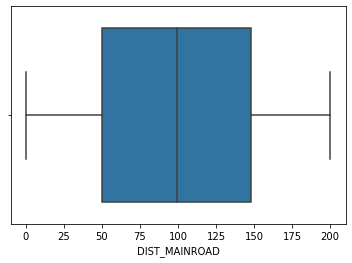

In [55]:
sns.boxplot(df['DIST_MAINROAD'])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

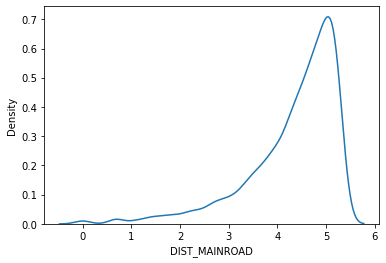

In [56]:
sns.kdeplot(np.log(df['DIST_MAINROAD']))

# df['N_BEDROOM']

<AxesSubplot:xlabel='N_BEDROOM', ylabel='Density'>

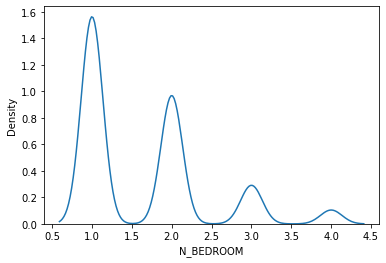

In [57]:
sns.kdeplot(df['N_BEDROOM'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N_BEDROOM'>

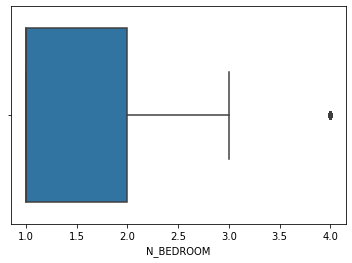

In [58]:
sns.boxplot(df['N_BEDROOM'])

<AxesSubplot:xlabel='N_BEDROOM', ylabel='Density'>

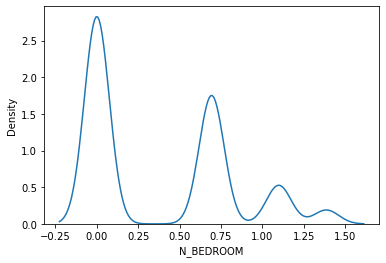

In [59]:
sns.kdeplot(np.log(df['N_BEDROOM']))

In [60]:
a,p_value=normaltest(df['N_BEDROOM'])
print(p_value)
alpha=0.05
if p_value>alpha:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

4.908000285366131e-248
Data is not normally distributed


In [63]:
a,p_value=normaltest(df['N_BATHROOM'])
print(p_value)
alpha=0.05
if p_value>alpha:
    print('Data is normally distributed')
else :
    print('Data is not normally distributed')

1.305984127937961e-295
Data is not normally distributed


In [64]:
y=df['SALES_PRICE']
x=df.drop('SALES_PRICE',axis=1)
x

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,UTILITY_AVAIL,MZZONE,...,QS_OVERALL,COMMIS,PARK_FACIL_No,PARK_FACIL_Yes,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,2266,5,1004,131,1.0,1.0,3,0,0,0,...,4.330,144400,0,1,1,0,0,0,0,1
1,6664,2,1986,26,2.0,1.0,5,0,0,3,...,3.765,304049,1,0,1,0,0,1,0,0
2,1270,0,909,70,1.0,1.0,3,0,1,4,...,3.090,92114,0,1,1,0,0,1,0,0
3,3755,7,1855,14,3.0,2.0,5,2,3,2,...,4.010,77042,1,0,0,0,1,0,0,1
4,4393,5,1226,84,1.0,1.0,3,0,0,1,...,3.290,74063,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,2697,5,598,51,1.0,1.0,2,1,1,5,...,2.520,107060,1,0,0,0,1,0,1,0
7105,7086,7,1897,52,3.0,2.0,5,2,2,3,...,3.920,205551,0,1,0,0,1,0,1,0
7106,6798,7,1614,152,2.0,1.0,4,3,2,2,...,3.840,167028,1,0,0,1,0,1,0,0
7107,4601,5,787,40,1.0,1.0,2,4,1,4,...,4.160,119098,0,1,1,0,0,0,0,1


In [62]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr_model=LinearRegression()

In [69]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred=lr_model.predict(x_test)
y_pred

array([11089227.96308946, 14550229.49560068, 13249086.66533542, ...,
        7007861.97236823,  9054485.96758008, 14339067.84643103])

In [71]:
lr_model.score(x_train,y_train)

0.9139126339929534

In [72]:
lr_model.score(x_test,y_test)

0.9158707242829338

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [74]:
r2_score=r2_score(y_test,y_pred)
r2_score

0.9158707242829338

In [75]:
mse=mean_squared_error(y_test,y_pred)
mse

1234842053691.7285

In [76]:
mae=mean_absolute_error(y_test,y_pred)
mae

840529.911474052